# Machine Learning Excercise
## Model Evaluation & Validation
## Where's the next CroqPain?

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

In [111]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from time import time
from sklearn.metrics import f1_score
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our restaurant's feature set for which we will be predicting an earning
# RESTAURANT_FEATURES = EARN, K, SIZE, EMPL, total, P15-P55, INC, COMP, NCOMP, NREST, PRICE, CLI

# Load dataset
restaurant_data = pd.read_csv("CP-1.csv")
print ("Restaurant data read successfully!")

# A bit of data exploration
n_store= restaurant_data.shape[0]
n_features = restaurant_data.shape[1]-1

print ("Total number of restaurants: {}".format(n_store))
print ("Number of features: {}".format(n_features))


Restaurant data read successfully!
Total number of restaurants: 50
Number of features: 15


In [112]:
restaurant_data.head()

,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI
0,28.3,861,129,14,8580,980,1280,560,1000,3100,27.6,8,1,45,16.1,129
1,-1.5,630,91,12,8460,1290,720,1200,1490,3100,28.3,2,2,27,11.4,116
2,68.9,1074,140,13,19250,2940,2490,3710,4030,5270,30.2,5,4,5,21.7,142
3,202.1,882,184,7,20920,3570,4930,4420,4300,2960,27.6,2,1,7,11.8,138
4,115.8,931,144,14,11660,1700,1140,2200,2140,2630,33.9,1,3,25,16.6,126


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the restaurant's feature set in `RESTAURANT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [113]:
#Select Earning Column
earnings = restaurant_data.loc[:,'EARN']

# Minimum restaurant earning in the dataset
minimum_earning = np.min(earnings)

# Maximum restaurant earning in the dataset
maximum_earning = np.max(earnings)

# Mean restaurant earningof the dataset
mean_earning = np.mean(earnings)

# Median restaurant earning of the dataset
median_earning = np.median(earnings)

# Standard deviation of restaurant earning of the dataset
std_dev = np.std(earnings)

# Show the calculated statistics
print ("Minimum restaurant earning :", minimum_earning)
print ("Maximum restaurant earning:", maximum_earning)
print ("Mean restaurant earning: {0:.3f}".format(mean_earning))
print ("Median restaurant earning:", median_earning)
print ("Standard deviation of restaurant earning: {0:.3f}".format(std_dev))

Minimum restaurant earning : -43.0
Maximum restaurant earning: 399.2
Mean restaurant earning: 139.164
Median restaurant earning: 137.45
Standard deviation of restaurant earning: 86.915


## Data Analysis
We will start by creating a scatterplot matrix that will allow us to visualize the pair-wise relationships and correlations between the different features.
It is also quite useful to have a quick overview of how the data is distributed and wheter it cointains or not outliers.

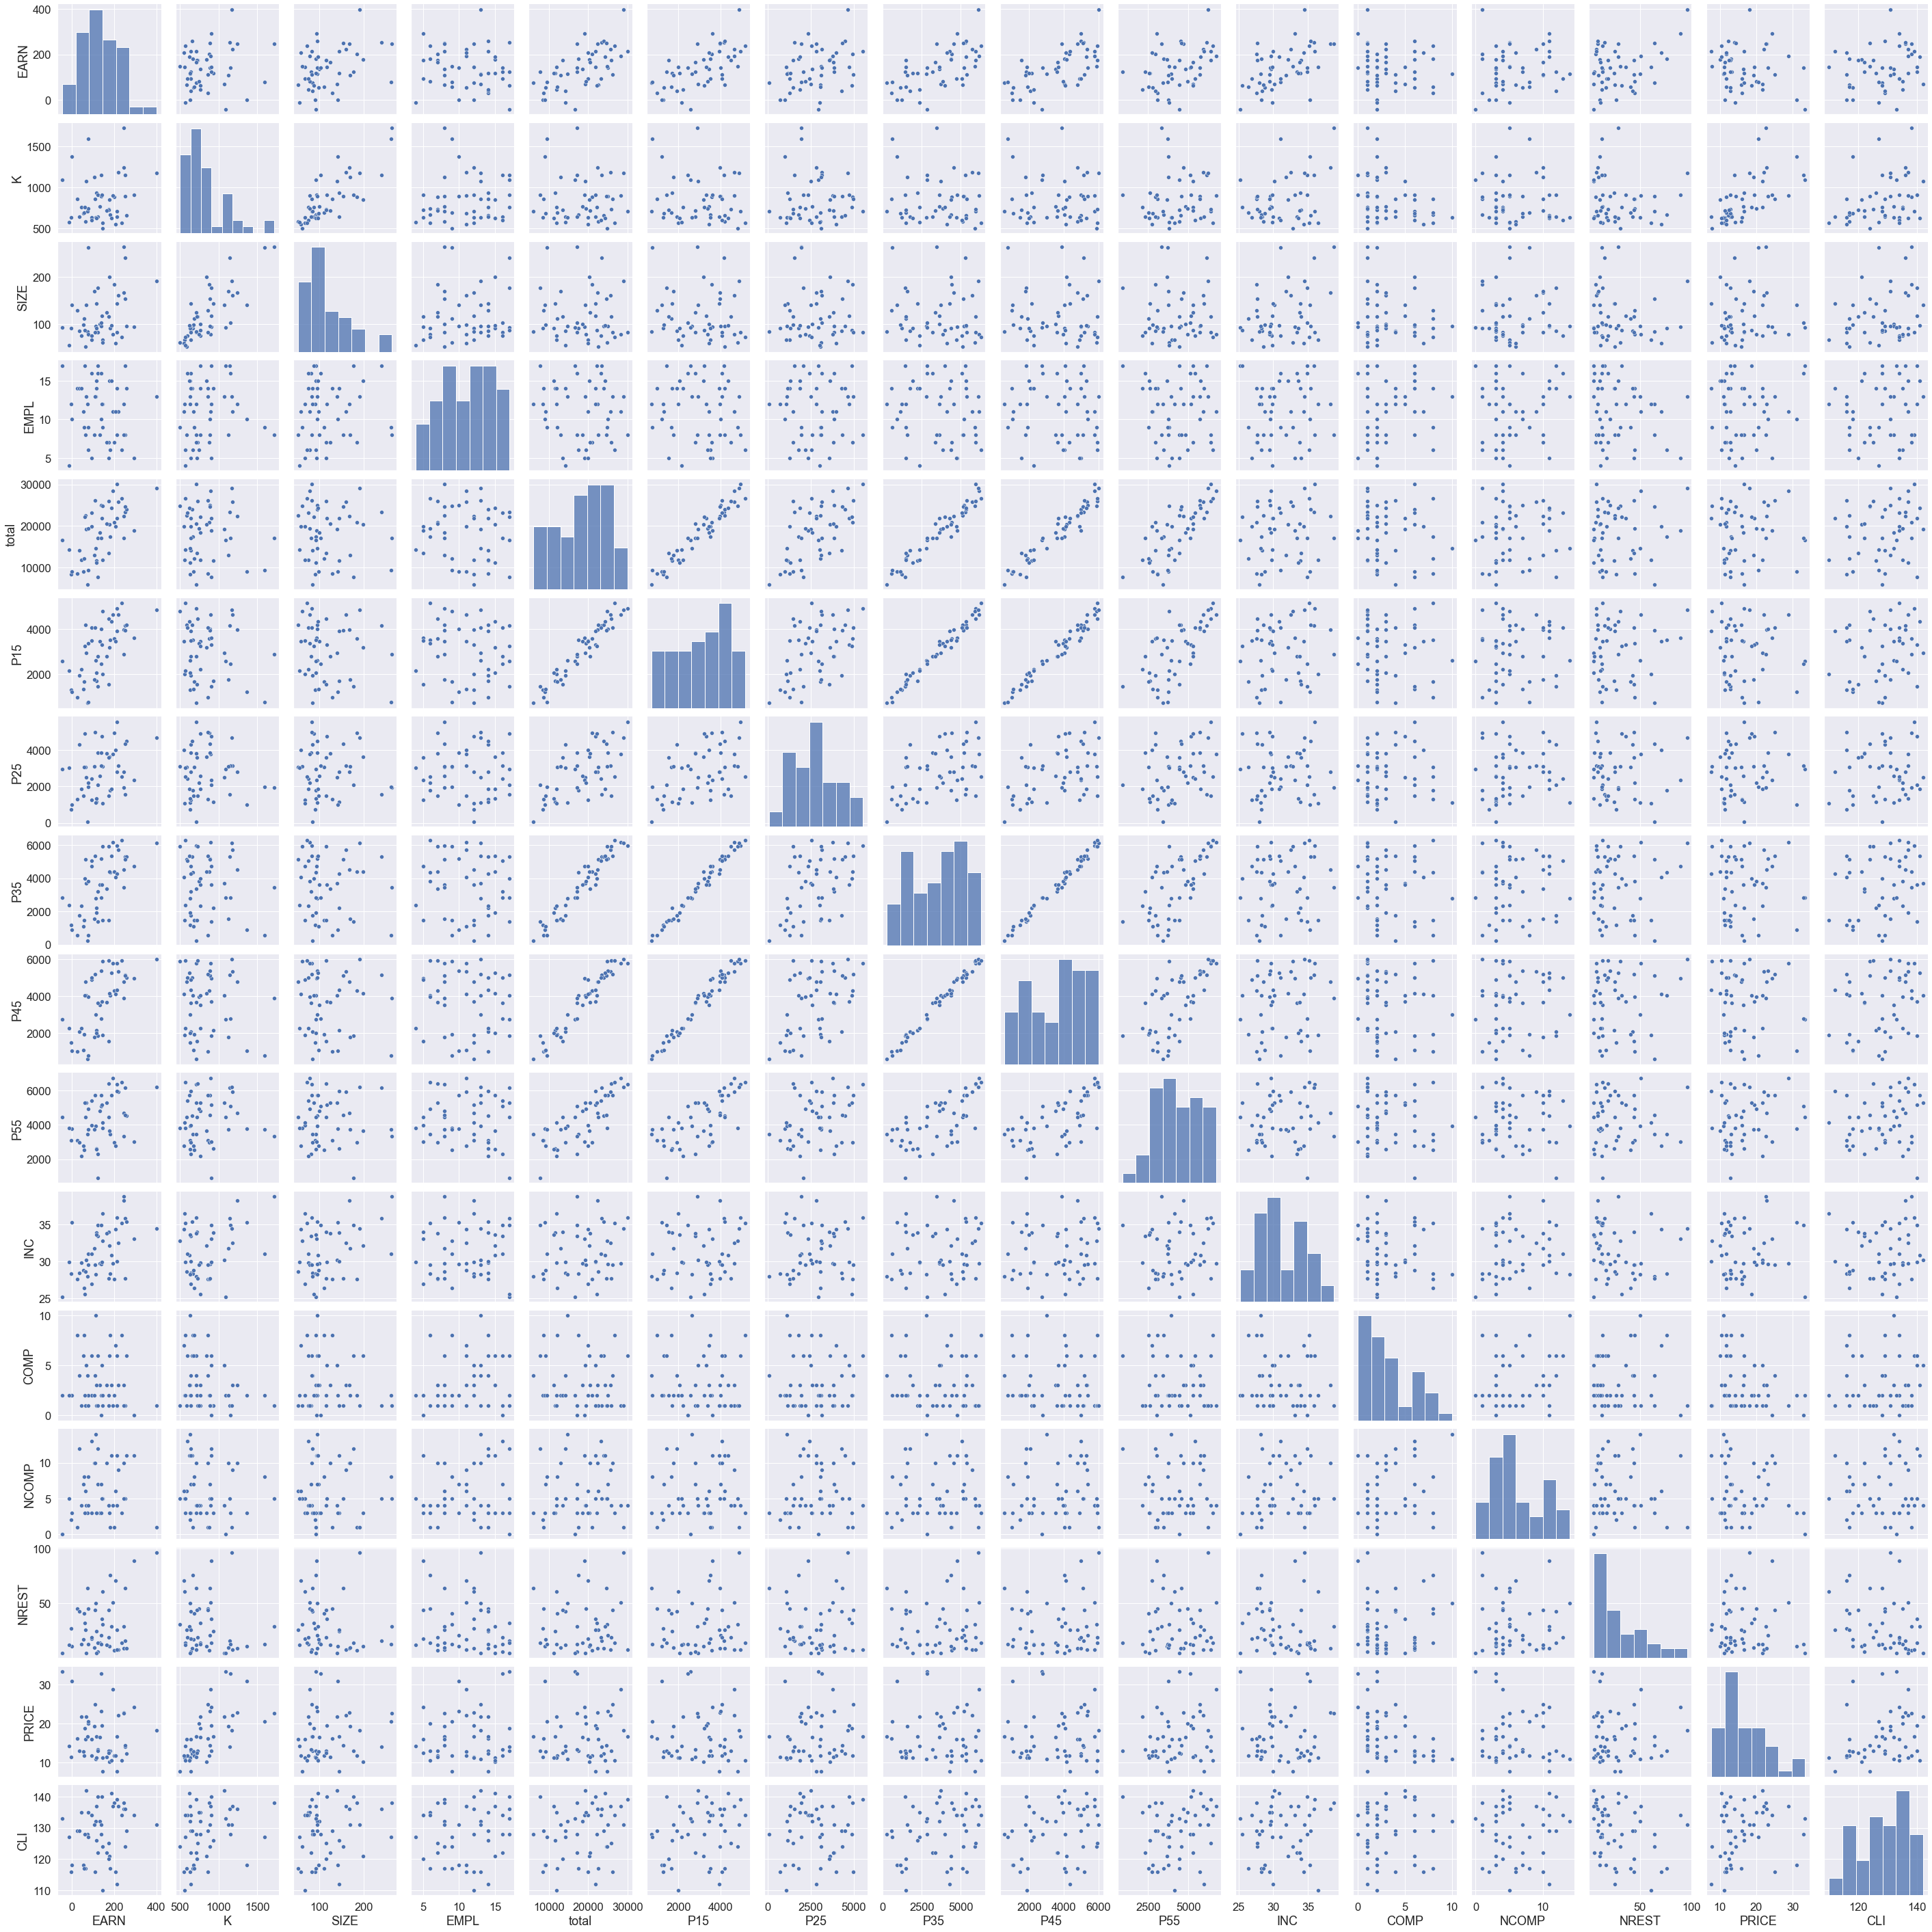

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Calculate and show pairplot
sns.pairplot(restaurant_data, height=2.5)
#plt.tight_layout()

## Correlation Matrix
We are going to create now a correlation matrix to quantify and summarize the relationships between the variables.
This correlation matrix is closely related witn covariance matrix, in fact it is a rescaled version of the covariance matrix, computed from standardize features.

It is a square matrix (with the same number of columns and rows) that contains the Person’s r correlation coefficient.

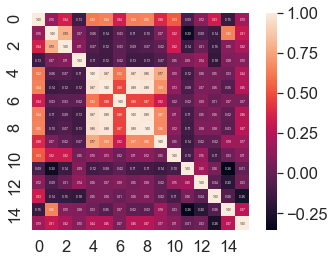

In [46]:
# Calculate and show correlation matrix
cm = np.corrcoef(restaurant_data.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 3})

In [50]:
import pandas as pd

features = restaurant_data.drop('EARN', axis = 1)
R_FEATURES=[[216.3, 776, 146, 11, 17440, 2800, 3180, 3050, 5490, 32.1, 2, 6, 26, 11.60, 124]]

chosen_features = ['K','SIZE','total','P15','P25','P35','P45','P55','INC','COMP','NCOMP','NREST','PRICE','CLI']

f_rest = features.columns.tolist()
for feature in chosen_features:
    index = f_rest.index(feature)
    print ("RESTAURANT FEATURES: ",R_FEATURES[0][index])

RESTAURANT FEATURES:  216.3
RESTAURANT FEATURES:  776
RESTAURANT FEATURES:  11
RESTAURANT FEATURES:  17440
RESTAURANT FEATURES:  2800
RESTAURANT FEATURES:  3180
RESTAURANT FEATURES:  3050
RESTAURANT FEATURES:  5490
RESTAURANT FEATURES:  32.1
RESTAURANT FEATURES:  2
RESTAURANT FEATURES:  6
RESTAURANT FEATURES:  26
RESTAURANT FEATURES:  11.6
RESTAURANT FEATURES:  124


In [51]:
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [64]:
# Put any import statements you need for this code block here
from sklearn.model_selection import cross_validate as crossval
from sklearn.model_selection import train_test_split

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
    
    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test

try:
    X_train, y_train, X_test, y_test = shuffle_split_data(features, earnings)
    print ("Successfully shuffled and split the data!")
except:
    print ("Something went wrong with shuffling and splitting the data.")

Successfully shuffled and split the data!


In [65]:
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    #error = metrics.mean_absolute_error(y_true, y_predict)
    # acc = accuracy_score (y_true, y_predict,normalize=True, sample_weight=None)
    error = mean_squared_error(y_true, y_predict)
    # meanAbsErr = mean_absolute_error (y_true, y_predict)
    return error

# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print ("Successfully performed a metric calculation!",total_error)
except:
    print ("Something went wrong with performing a metric calculation.")

Successfully performed a metric calculation! 0.0


In [68]:
# Put any import statements you need for this code block
from sklearn import metrics
from sklearn.model_selection import learning_curve, GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """
    
    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = metrics.make_scorer(performance_metric, greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor,parameters,scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(features, earnings)
    print ("Successfully fit a model!")
except:
    print ("Something went wrong with fitting a model.")

Successfully fit a model!


C:\Users\Sophia\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass scoring=make_scorer(performance_metric, greater_is_better=False) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [69]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print ("Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .")
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [70]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print ("Creating a model complexity graph. . . ")

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(10, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


<ipython-input-69-3127754a577d>:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


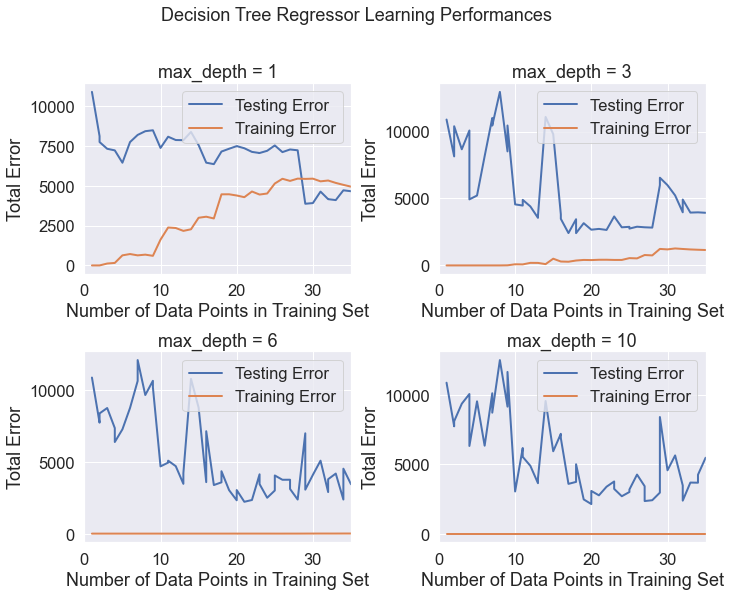

In [71]:
learning_curves(X_train, y_train, X_test, y_test)

Creating a model complexity graph. . . 


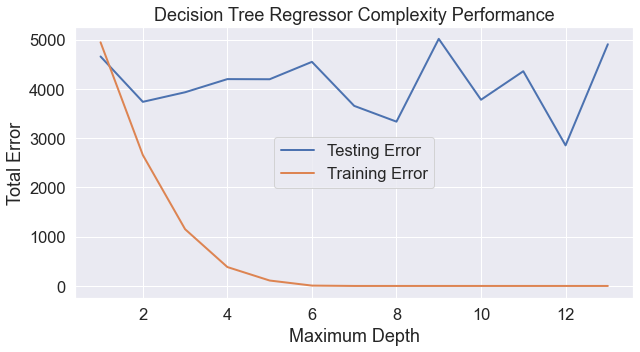

In [72]:
model_complexity(X_train, y_train, X_test, y_test)

In [73]:
print ("Final model has an optimal max_depth parameter of", reg.get_params()['max_depth'])


Final model has an optimal max_depth parameter of 2


In [75]:
earning_result = reg.predict(R_FEATURES)
print ("Predicted value of restaurant earnings: {0:.3f}".format(earning_result[0]))

Predicted value of restaurant earnings: 133.073


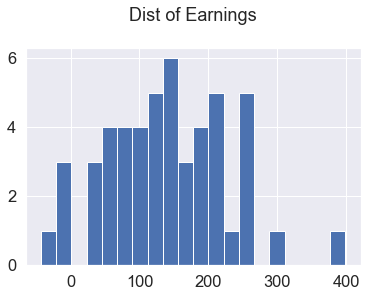

In [76]:
import pandas as pd

hist_test= pd.DataFrame(list(y_test)+list(y_train)).hist(bins = 20)
hist_test[0][0].set_title("Dist of Earnings\n");

## R-Squared
The values for R² range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable.

A model with an R² of 0 is no better than a model that always predicts the mean of the target variable.

Whereas a model with an R² of 1 perfectly predicts the target variable.
Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features.

In [107]:
data = pd.read_csv('CP-1_Reduced.csv')
r_earn = data['EARN']
features = data.drop('EARN', axis = 1)

In [88]:
np.amin(r_earn)

-43.0

In [89]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [90]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, r_earn, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?
It is useful to evaluate our model once it is trained. We want to know if it has learned properly from a training split of the data. There can be 3 different situations:

1) The model didn´t learn well on the data, and can’t predict even the outcomes of the training set, this is called underfitting and it is caused because a high bias.

2) The model learn too well the training data, up to the point that it memorized it and is not able to generalize on new data, this is called overfitting, it is caused because high variance.

3) The model just had the right balance between bias and variance, it learned well and is able predict correctly the outcomes on new data.

C:\Users\Sophia\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Sophia\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Sophia\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Sophia\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Sophia\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings

C:\Users\Sophia\Documents\AESE\visual.py:68: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


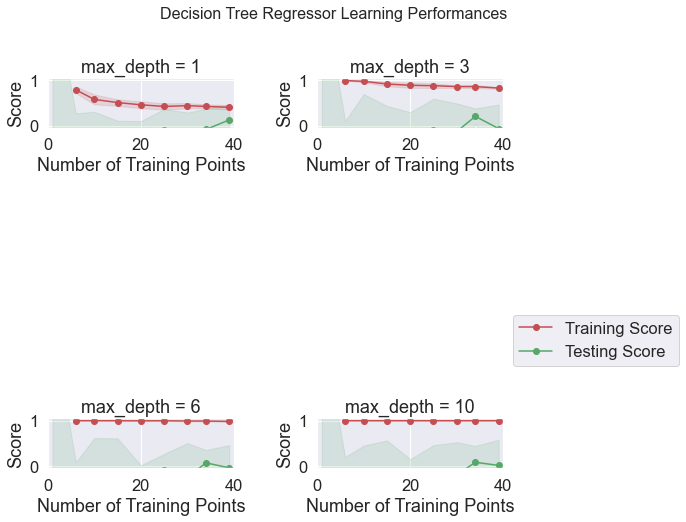

In [91]:
import visual as vs
vs.ModelLearning(features, r_earn)

Learning the Data
If we take a close look at the graph with the max depth of 3:

As the number of training points increases, the training score decreases. In contrast, the test score increases.

As both scores (training and testing) tend to converge, from the 40 points treshold, having more training points will not benefit the model.

(Extra question): In general, with more columns for each observation, we'll get more information and the model will be able to learn better from the dataset and therefore, make better predictions.

Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

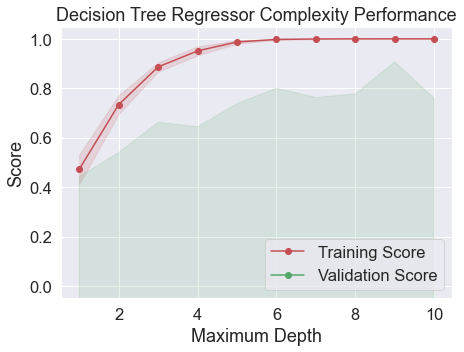

In [92]:
vs.ModelComplexity(X_train, y_train)

### Implementation: Fitting a Model


In [93]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [94]:

# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 1 for the optimal model.


In [100]:
restaurant_data = [[688, 92, 6070, 36 ,31], # Test 1
                   [660, 54, 430, 38, 18],] # Test 2

# Show predictions
for i, price in enumerate(reg.predict(restaurant_data)):
    print("Predicted earning estimate {}'s CroqPain: ${:,.2f}".format(i+1, price))

Predicted earning estimate 1's CroqPain: $209.84
Predicted earning estimate 2's CroqPain: $89.58


In [109]:
vs.PredictTrials(features, r_earn, fit_model, restaurant_data)

Trial 1: $45.40
Trial 2: $37.03
Trial 3: $57.80
Trial 4: $53.79
Trial 5: $0.60
Trial 6: $108.30
Trial 7: $88.54
Trial 8: $89.19
Trial 9: $54.80
Trial 10: $60.29

Range in prices: $107.70
